# Guided and Leaky modes of slab waveguide

Simple 3 layer structure: cladding-core-cladding.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from fiberamp.fiber.microstruct.bragg import plotlogf, plotlogf_real
from scipy.optimize import newton
from IPython.display import Video
plt.style.use('dark_background')
%matplotlib widget


In [194]:
A = SlabExact(symmetric=True, ns=[1.3+.03j, 1.5+.03j, 1.3+.03j], Ts=[5, 2, 5])

/home/pv/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/pv/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


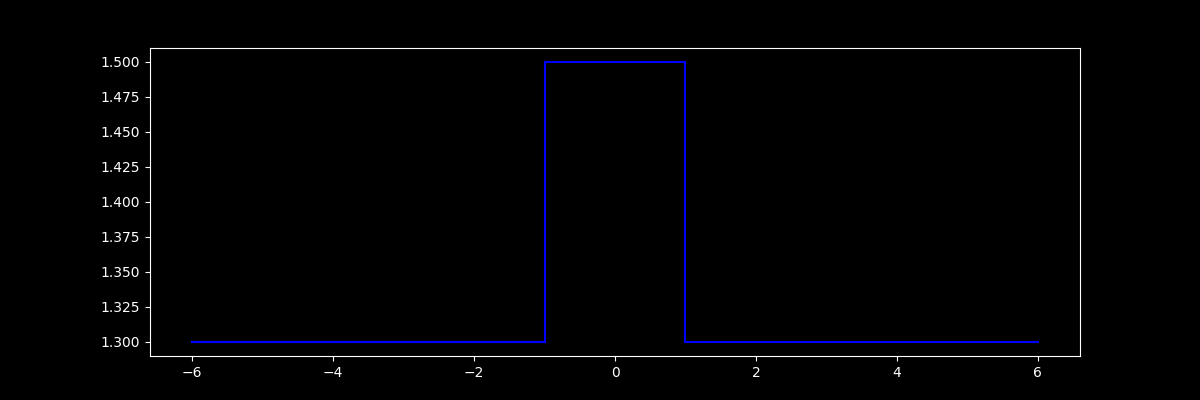

In [195]:
A.plot_refractive_index()

## Guided

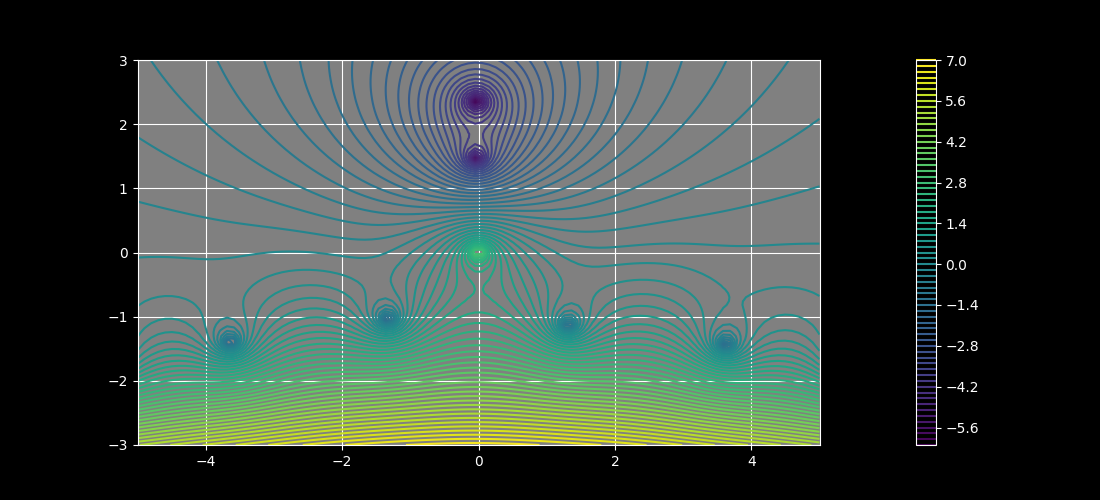

In [196]:
A.deteriminant_plot(-5,5, -3, 3, mode_type='guided', plot_sdp=False)

In [197]:
Z1 = newton(A.determinant_Z, np.array([2.5j]), )
Z2 = newton(A.determinant_Z, np.array([1.2j]))

Z1, Z2

(array([-0.02929703+2.35747574j]), array([-0.03605468+1.46217308j]))

In [198]:
Fs1 = A.fields_Z(Z1, mode_type='guided')
Fs2 = A.fields_Z(Z2, mode_type='guided')

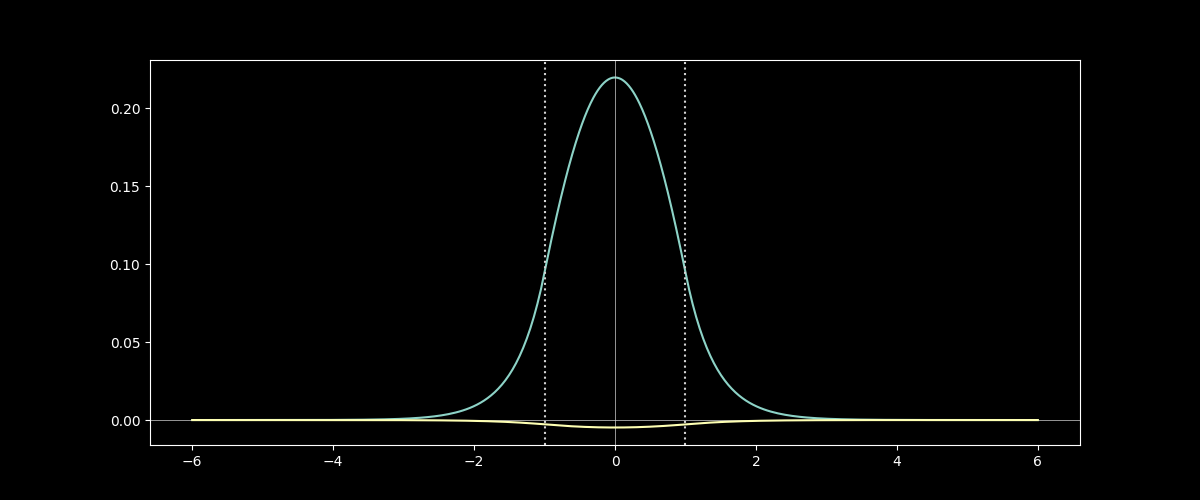

In [199]:
A.plot_field_1d(Fs1)
A.add_1d_plot(Fs1, part='imag')

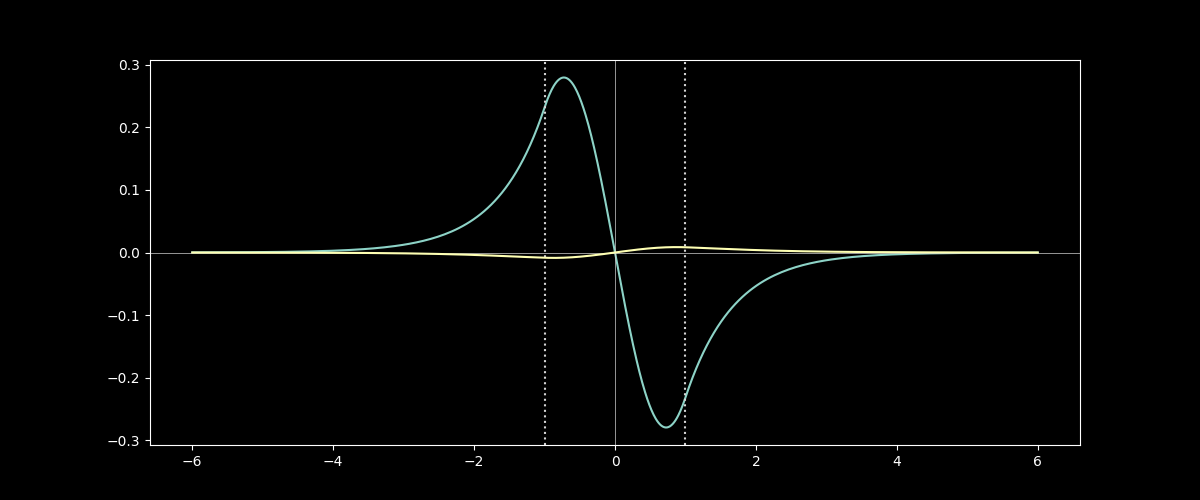

In [200]:
A.plot_field_1d(Fs2)
A.add_1d_plot(Fs2, part='imag')

## 2D plots

(<Figure size 720x900 with 2 Axes>, <Axes: >)

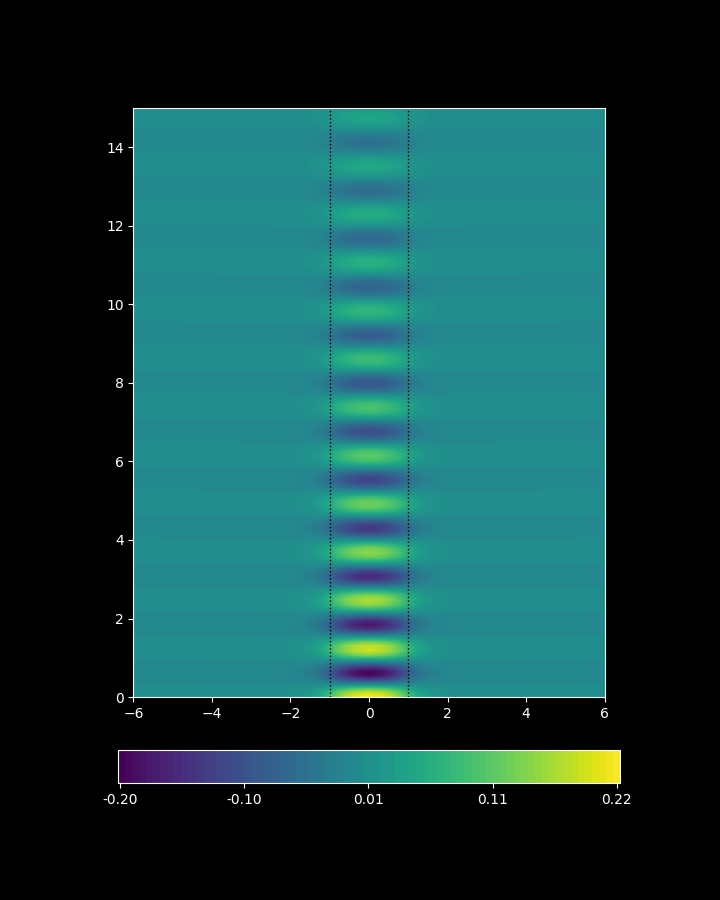

In [201]:
A.plot_field_2d(Fs1, xs=np.linspace(-6,6,100), zmax=15, zref=140, levels=80)

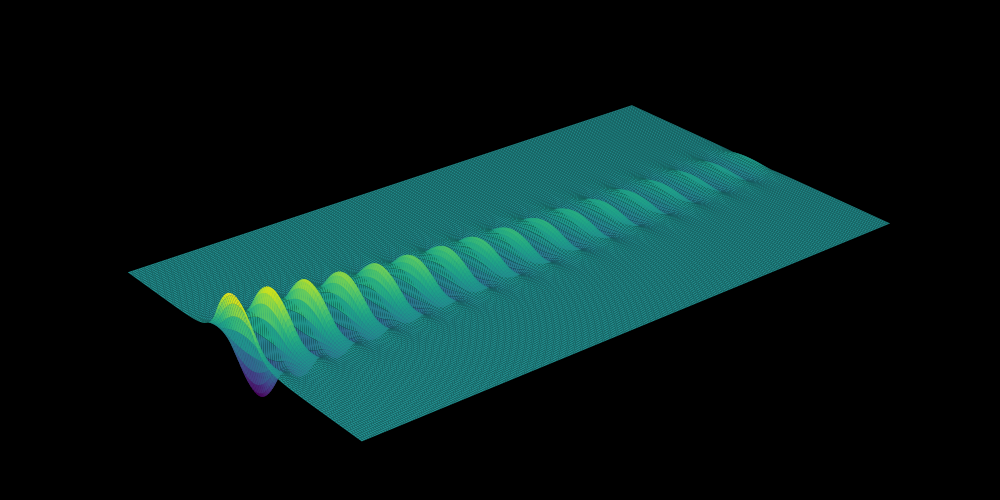

In [212]:
A.plot_field_2d_surface(Fs1, xs=np.linspace(-6,6,500), zmax=20, zref=1200, elev=27, azim=-39);

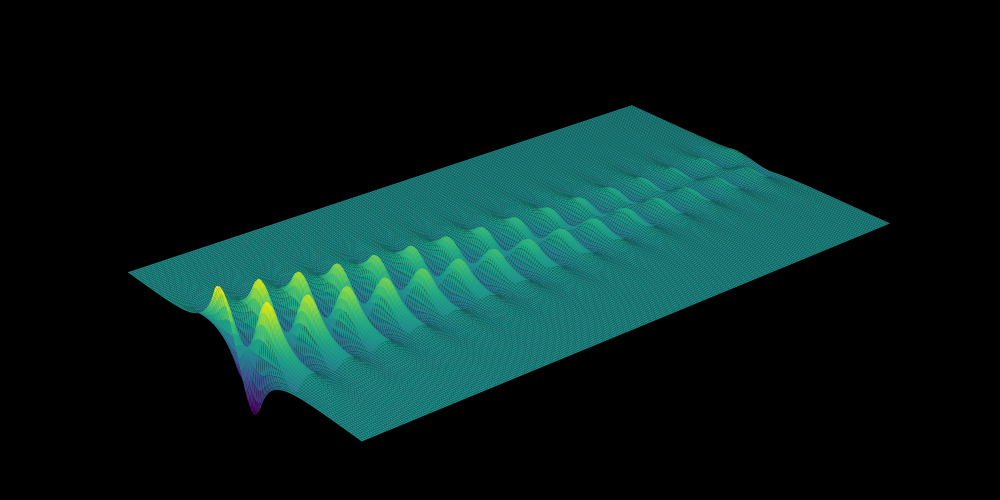

In [213]:
A.plot_field_2d_surface(Fs2, xs=np.linspace(-6,6,500), zmax=20, zref=1200, elev=27, azim=-39);

# Leaky Modes

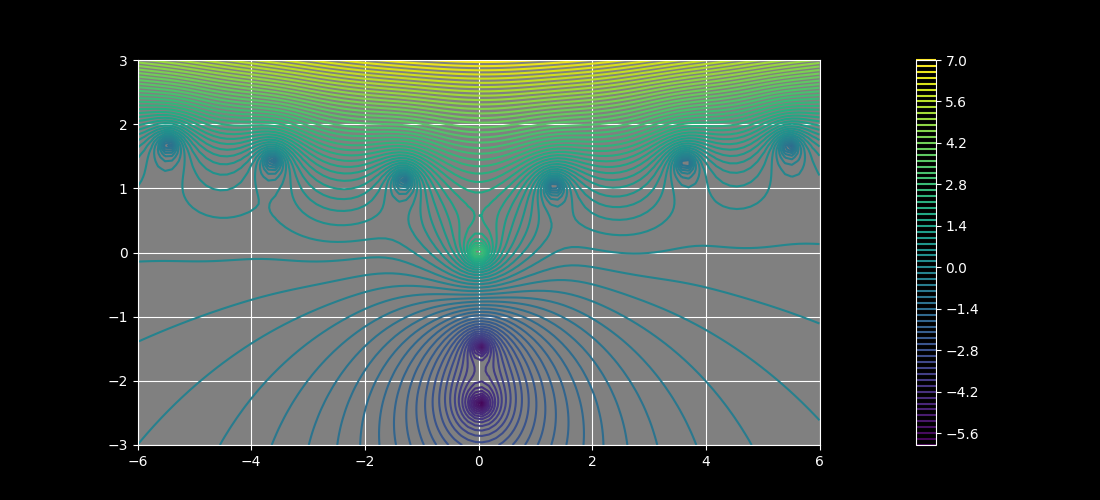

In [203]:
A.deteriminant_plot(-6, 6, -3, 3, mode_type='leaky', plot_sdp=False)

In [208]:
Z2_leaky = newton(A.determinant_Z, np.array([-1.3+1j]), args=('TE', 'leaky'))[0]
Z2_leaky

(-1.314791576398237+1.1353841293667994j)

In [210]:
Fs2leaky = A.fields_Z(Z2_leaky, mode_type='leaky')

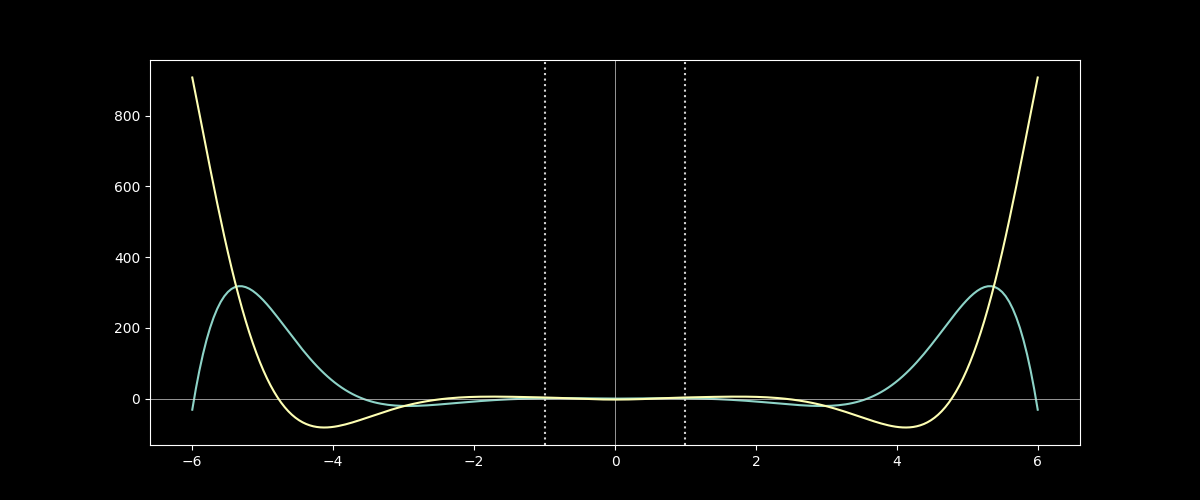

In [214]:
A.plot_field_1d(Fs2leaky)
A.add_1d_plot(Fs2leaky, part='imag')